In [60]:
#import libraries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#define parameters 
iterations = 1000
r_min = 0
r_max = 2
theta_min = 0
theta_max = 2*np.pi/3
r_bins = 100
theta_bins = 100
dr = (r_max - r_min)/r_bins
dtheta = (theta_max - theta_min)/theta_bins

#define linspaces
r_space = np.linspace(r_min, r_max, r_bins)
theta_space = np.linspace(theta_min, theta_max + dtheta, theta_bins)

#define a gridfunction solution and boundary conditions 
psi = np.ones((r_space.size, theta_space.size))  
psi[:, 0] = 0
psi[:, -1] = 100  
psi[-1,:] = 100

#improve the approximate solution
for ss in range(iterations):
    #walk through every node and update the value function 
    for r_index in range(1, r_space.size-1):
        for theta_index in range(1, theta_space.size-1):
            
            #define discretization constants 
            alpha = 2*dr**2 
            beta = r_index*dr*dr
            gamma = 2*(r_index*dr*dtheta)**2      
            coeficient = 1/(2/alpha + 1/beta + 2/gamma)
            
            #define discretization terms
            temp1 = psi[r_index+1, theta_index] + psi[r_index-1, theta_index]
            temp2 = psi[r_index+1, theta_index]
            temp3 = psi[r_index, theta_index+1] + psi[r_index, theta_index-1]
            
            #update gridfunction
            psi[r_index, theta_index] = coeficient*(temp1/alpha + temp2/beta + temp3/gamma)


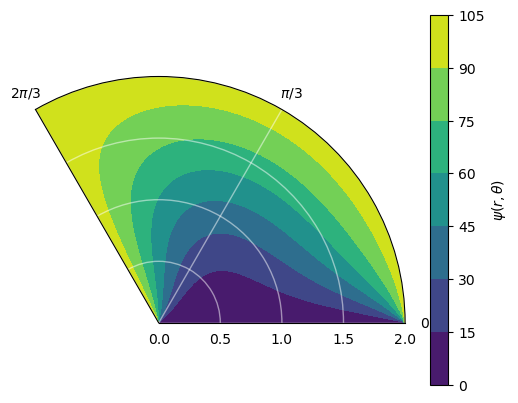

In [62]:
#customize the grid 
radians = np.arange(0, 120+1, 60)
radial = np.arange(0, 2+1, 0.5)

# plotting
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(theta_space, r_space, psi)
color_bar = plt.colorbar(ctf)
color_bar.set_label(r"$\psi(r,\theta)$")
ax.set_thetagrids(radians, labels=[str(i) for i in ['$0$',r'$\pi/3$',r'$2\pi/3$']])
ax.set_rgrids(radial, labels=[str(i) for i in np.arange(0, 2+1, 0.5)])
plt.grid(False)
plt.grid(color='white', linestyle='-', linewidth=1, alpha=0.5)
plt.axis([theta_min, theta_max, r_min, r_max])
plt.savefig('laplace-polar1.pdf')
plt.show()